In [6]:
import numpy as np 
import matplotlib.pyplot as plt 

In [23]:
def inputfun(x):
    return (x-2) * (x-3) * (x+8) * (x - 9)

initT = 1000
minT = 1
interL = 1000
delta = 0.95

k = 1
initX = 10 * (2 * np.random.rand() - 1)
nowT = initT

print ("初始解：",initX,inputfun(initX))

初始解： -6.453580258341097 -1909.8246439623888


-6.3338955487686395 -1987.3104438308137 1000
-5.750989716337008 -2250.2301310171924 950.0
-5.397786284468244 -2327.5835714298287 902.5
-5.023840877686434 -2352.231678288953 857.375
-5.542343748312055 -2302.708215562045 814.5062499999999
-5.906964728956711 -2197.3806960053607 773.7809374999998
-6.555807613318823 -1836.73297306187 735.0918906249998
-6.424122119299251 -1929.6945659014584 698.3372960937497
-5.956822810044164 -2177.905591323893 663.4204312890622
-5.939680523947008 -2184.745758115391 630.2494097246091
-5.939680523947008 -2184.745758115391 598.7369392383787
-5.149456429094023 -2350.0067284384972 568.8000922764597
-5.483438452270201 -2313.941307919599 540.3600876626367
-5.483438452270201 -2313.941307919599 513.3420832795049
-5.2436165703666635 -2344.4077140994436 487.6749791155296
-5.217157589000616 -2346.3305491457463 463.29123015975307
-4.348749529353375 -2273.965383721725 440.1266686517654
-5.301185856166422 -2339.260402820582 418.1203352191771
-6.134699137961626 -2097.7726

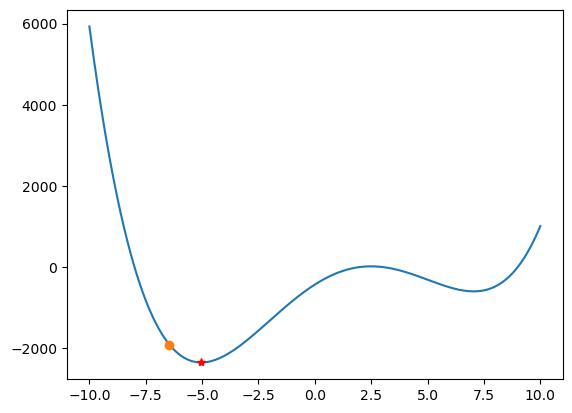

In [24]:
# 函数的输入及画图操作
xx = np.linspace(-10, 10, 300)
yy = inputfun(xx)
plt.figure()
plt.plot(xx, yy)
plt.plot(initX,inputfun(initX), 'o')


# 模拟退火寻找最小值的过程
while nowT > minT:
    for i in np.arange(1,interL,1):
        funVal = inputfun(initX)
        xnew = initX + (2*np.random.rand()-1)
        if xnew >= -10 and xnew <= 10:
            funnew = inputfun(xnew)
            res = funnew - funVal
            if res < 0:
                initX = xnew
            else:
                p = np.exp(-(res)/(k*nowT))
                if np.random.rand() < p:
                    initX = xnew
        
        print(initX,inputfun(initX),nowT)
        nowT = nowT*delta

print("The minimum value is:", initX)
print("The minimum value of function is:", inputfun(initX))
plt.plot(initX,inputfun(initX),'*r')
plt.show()

最优解: x = 0.00090, f(x) = 0.00000


c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30446 (\N{CJK UNIFIED IDEOGRAPH-76EE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20989 (\N{CJK UNIFIED IDEOGRAPH-51FD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu San

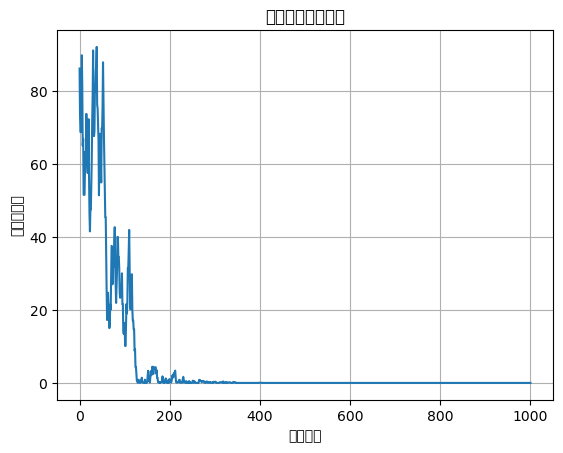

In [ ]:
import math
import random
import matplotlib.pyplot as plt

# 目标函数
def objective_function(x):
    return x ** 2

# 模拟退火算法
# ================ 2. 模拟退火算法实现 ================
def simulated_annealing(target_func,current_x, initial_temp=1000, cooling_rate=0.95, max_iter=1000, x_range=(-10, 10)):
    # 初始解（随机生成）
    current_value = target_func(current_x)
    best_x = current_x
    best_value = current_value
    
    temp = initial_temp
    history = []  # 记录搜索过程
    for i in range(max_iter):
        # 产生新解
        new_x = current_x + random.uniform(-1, 1)
        new_x = np.split(new_x, *x_range) # 限制在范围内
        new_value = target_func(new_x)
        # 计算能量差
        delta_e = new_value - current_value
        if delta_e < 0 or  random.random() < math.exp(-delta_e / temp):
            # 接受新解
            current_x = new_x
            current_value = new_value
        # 记录历史
        history.append(current_value)
        # 更新最优解
        if current_value < best_value:
            best_x = current_x
            best_value = current_value

    return best_x, best_energy, history

# 参数设置
bounds = (-10, 10)
max_iter = 1000
initial_temp = 100
cooling_rate = 0.98

# 运行模拟退火
best_x, best_energy, energy_history = simulated_annealing(objective_function, bounds, max_iter, initial_temp, cooling_rate)

print(f"最优解: x = {best_x:.5f}, f(x) = {best_energy:.5f}")

# 可视化收敛过程
plt.plot(energy_history)
plt.title("模拟退火收敛过程")
plt.xlabel("迭代次数")
plt.ylabel("目标函数值")
plt.grid(True)
plt.show()

Iteration 0: Temp=950.00, x=-6.443, f(x)=39.920
Iteration 100: Temp=5.62, x=-1.880, f(x)=-5.988
Iteration 200: Temp=0.03, x=-1.377, f(x)=-7.916
Iteration 300: Temp=0.00, x=-1.308, f(x)=-7.946
Iteration 400: Temp=0.00, x=-1.308, f(x)=-7.946
Iteration 500: Temp=0.00, x=-1.308, f(x)=-7.946
Iteration 600: Temp=0.00, x=-1.307, f(x)=-7.946
Iteration 700: Temp=0.00, x=-1.307, f(x)=-7.946
Iteration 800: Temp=0.00, x=-1.307, f(x)=-7.946
Iteration 900: Temp=0.00, x=-1.307, f(x)=-7.946


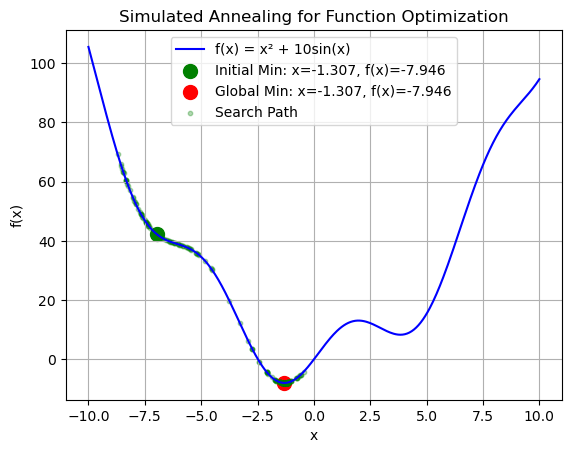


Global Minimum Found: x = -1.30718, f(x) = -7.94582


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

# ================ 1. 定义目标函数 ================
def target_function(x):
    return x**2 + 10 * np.sin(x)

# ================ 2. 模拟退火算法实现 ================
def simulated_annealing(target_func,current_x, initial_temp=1000, cooling_rate=0.95, max_iter=1000, x_range=(-10, 10)):
    # 初始解（随机生成）
    current_value = target_func(current_x)
    best_x = current_x
    best_value = current_value
    
    temp = initial_temp
    history = []  # 记录搜索过程
    
    for i in range(max_iter):
        # 生成新解：在当前解附近随机扰动
        new_x = current_x + random.uniform(-1, 1)
        new_x = np.clip(new_x, *x_range)  # 限制在定义域内
        new_value = target_func(new_x)
        
        # 计算能量差
        delta_e = new_value - current_value
        
        # 接受准则
        if delta_e < 0 or random.random() < math.exp(-delta_e / temp):
            current_x = new_x
            current_value = new_value
            
            # 更新全局最优解
            if current_value < best_value:
                best_x = current_x
                best_value = current_value
        
        # 降温
        temp *= cooling_rate
        history.append((current_x, current_value))
        
        # 打印进度
        if i % 100 == 0:
            print(f"Iteration {i}: Temp={temp:.2f}, x={current_x:.3f}, f(x)={current_value:.3f}")
    
    return best_x, best_value, history

# ================ 3. 运行算法 ================
x_range=(-10, 10)
current_x = random.uniform(*x_range)
current_value = target_function(current_x)
best_x, best_value, history = simulated_annealing(target_function, 
                                                 current_x,
                                                 initial_temp=1000, 
                                                 cooling_rate=0.95,
                                                 x_range=x_range, 
                                                 max_iter=1000)

# ================ 4. 可视化结果 ================
# 绘制函数曲线
x_vals = np.linspace(-10, 10, 400)
y_vals = target_function(x_vals)
plt.plot(x_vals, y_vals, 'b-', label="f(x) = x² + 10sin(x)")

plt.scatter(current_x, current_value, c='green', s=100, label=f"Initial Min: x={best_x:.3f}, f(x)={best_value:.3f}")
# 标注最优解
plt.scatter(best_x, best_value, c='red', s=100, label=f"Global Min: x={best_x:.3f}, f(x)={best_value:.3f}")

# 绘制搜索过程
search_x = [h[0] for h in history]
search_y = [h[1] for h in history]

plt.scatter(search_x, search_y, c='green', s=10, alpha=0.3, label="Search Path")

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Simulated Annealing for Function Optimization")
plt.legend()
plt.grid()
plt.show()

# 打印最终结果
print(f"\nGlobal Minimum Found: x = {best_x:.5f}, f(x) = {best_value:.5f}")